# Check Green's Functions

This notebook just rapidly plots the waveforms of each component of the moment tensor in each component NEZ for all results of any SW4 run

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from obspy import Stream,Trace, read, UTCDateTime
import json

In [ ]:
-rw-r--r--@ 1 lpapin  staff  8184 Nov 15 10:36 GLBC_mxx.e
-rw-r--r--@ 1 lpapin  staff  8184 Nov 15 10:36 KELB_mxx.e
-rw-r--r--@ 1 lpapin  staff  8184 Nov 15 10:36 KLNB_mxx.e
-rw-r--r--@ 1 lpapin  staff  8184 Nov 15 10:36 MGCB_mxx.e
-rw-r--r--@ 1 lpapin  staff  8184 Nov 15 10:36 SHDB_mxx.e
-rw-r--r--@ 1 lpapin  staff  8184 Nov 15 10:36 SHVB_mxx.e
-rw-r--r--@ 1 lpapin  staff  8184 Nov 15 10:36 SOKB_mxx.e
-rw-r--r--@ 1 lpapin  staff  8184 Nov 15 10:41 TWKB_mxx.e

In [83]:
stas=['GLBC','KELB','KLNB','MGCB','SHDB','SHVB','SOKB','TWKB']
#stas=['JRBC','LZB','TSJB']
st= Stream()
comps=["mxx","mxy","mxz","myy","myz","mzz"]
starttime=UTCDateTime("2000-01-01")
short=[]
base_dir='results/run2/tensors/'
for sta in stas:
    for comp in comps:
        temp=read(base_dir+f"{sta}_{comp}.e")
        temp[0].stats.station=sta
        temp[0].stats.starttime=starttime
        temp[0].stats.location=comp
        temp[0].stats.component='E'
        st+=temp
        temp=read(base_dir+f"{sta}_{comp}.n")
        temp[0].stats.station=sta
        temp[0].stats.starttime=starttime
        temp[0].stats.location=comp
        temp[0].stats.component='N'
        st+=temp
        temp=read(base_dir+f"{sta}_{comp}.u")
        temp[0].stats.station=sta
        temp[0].stats.starttime=starttime
        temp[0].stats.location=comp
        temp[0].stats.component='Z'
        st+=temp
        delta=temp[0].stats.endtime-temp[0].stats.starttime
        if delta<14.9:
            short.append(f"{sta}.{comp}")

In [72]:
#st.select(station="TWKB").plot()

In [84]:
st.filter('lowpass',freq=4,zerophase=True)

144 Trace(s) in Stream:

.GLBC.mxx.EE | 2000-01-01T00:00:00.000000Z - 2000-01-01T00:00:15.000001Z | 125.8 Hz, 1888 samples
...
(142 other traces)
...
.TWKB.mzz.UZ | 2000-01-01T00:00:00.000000Z - 2000-01-01T00:00:15.000001Z | 125.8 Hz, 1888 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [76]:
#st.select(station="TWKB").plot()

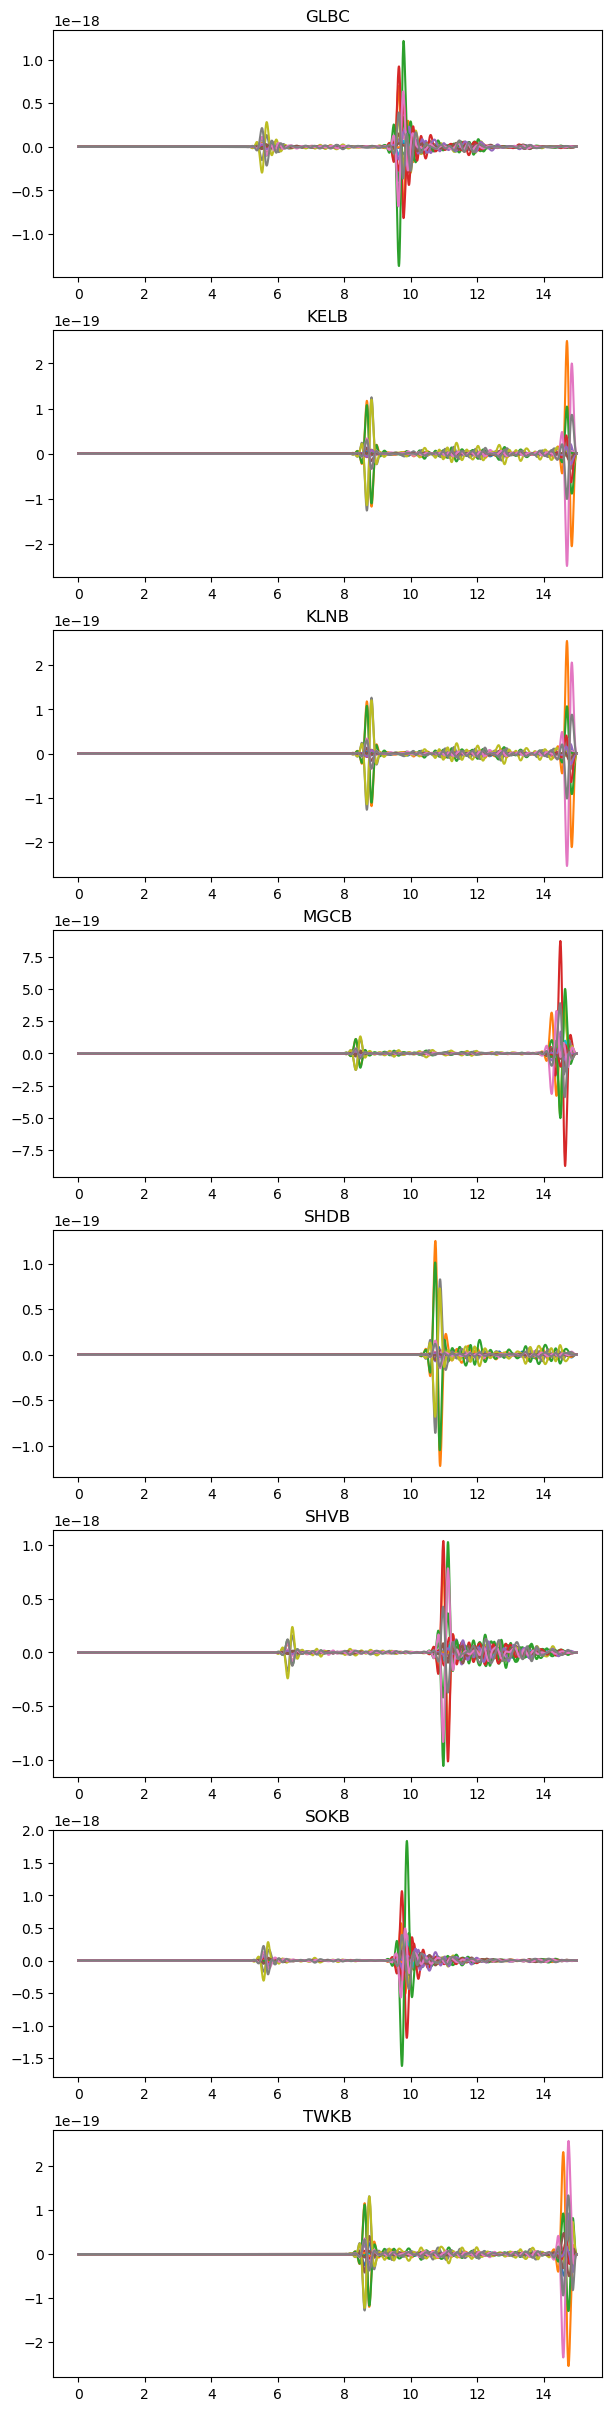

In [85]:
fig, axs= plt.subplots( len(stas),1, constrained_layout=True, figsize=(6,3*len(stas)))
for sta, ax in zip(stas, axs):
    for tr in st.select(station=sta):
        ax.plot(tr.times('relative'),tr.data)
        ax.set_title(sta)

In [86]:
comps

['mxx', 'mxy', 'mxz', 'myy', 'myz', 'mzz']

## Different plots

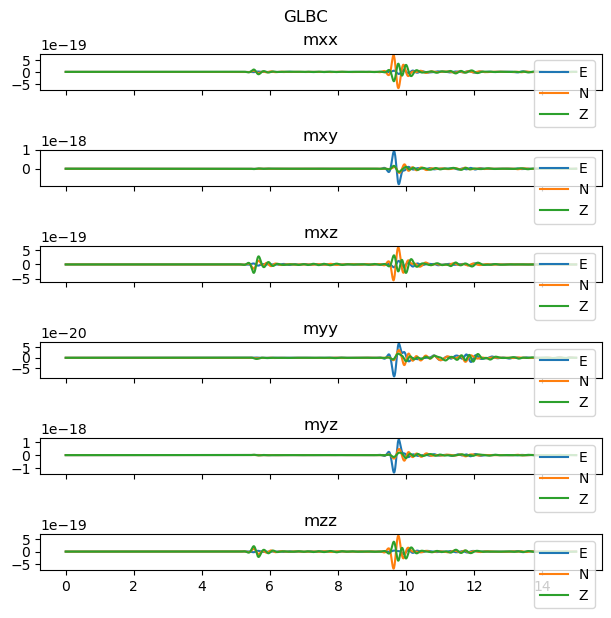

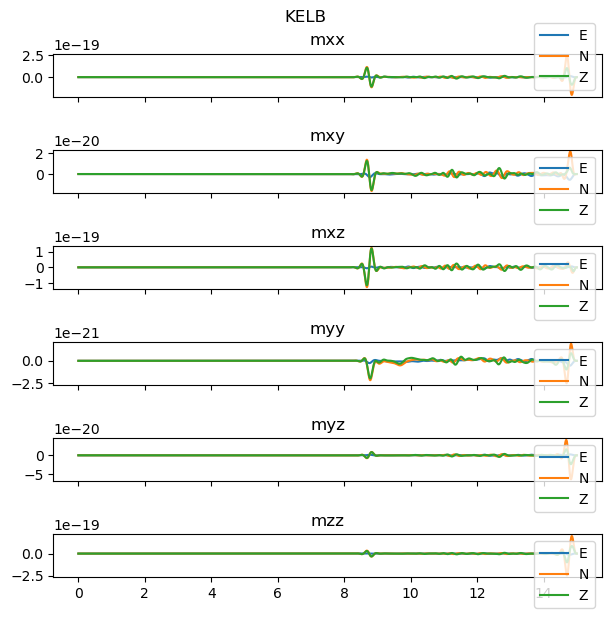

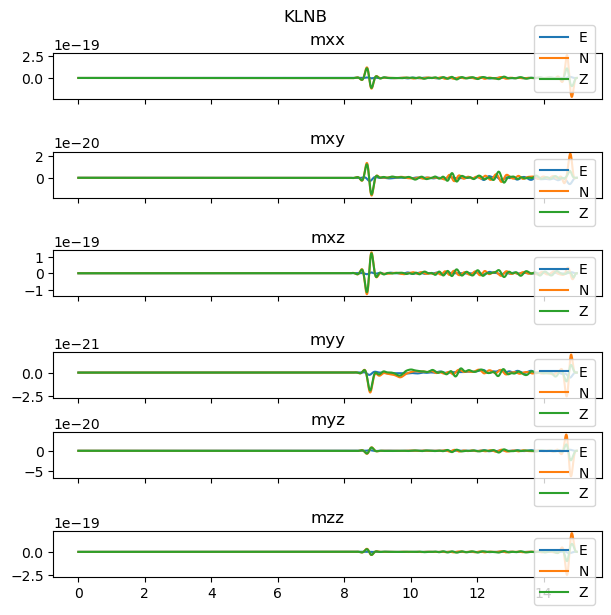

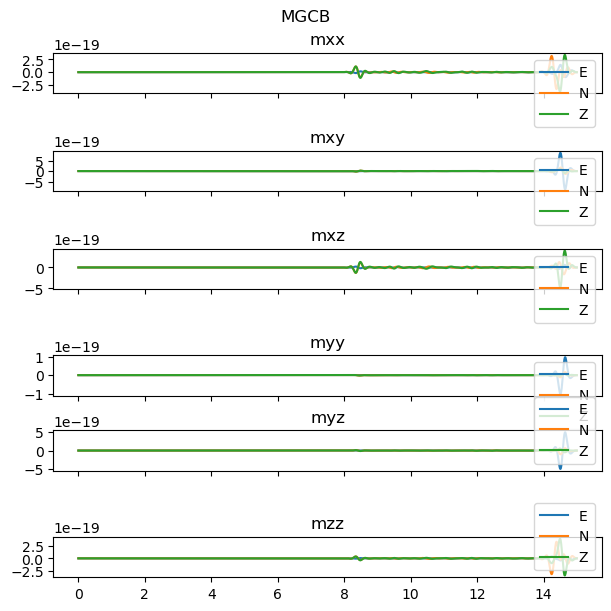

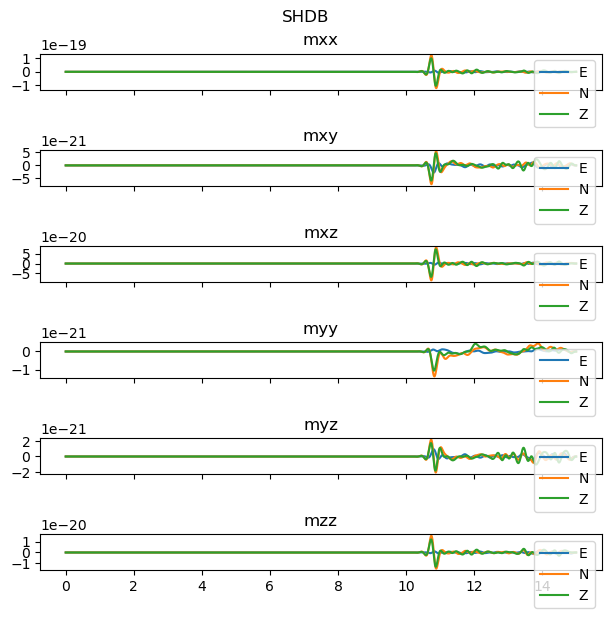

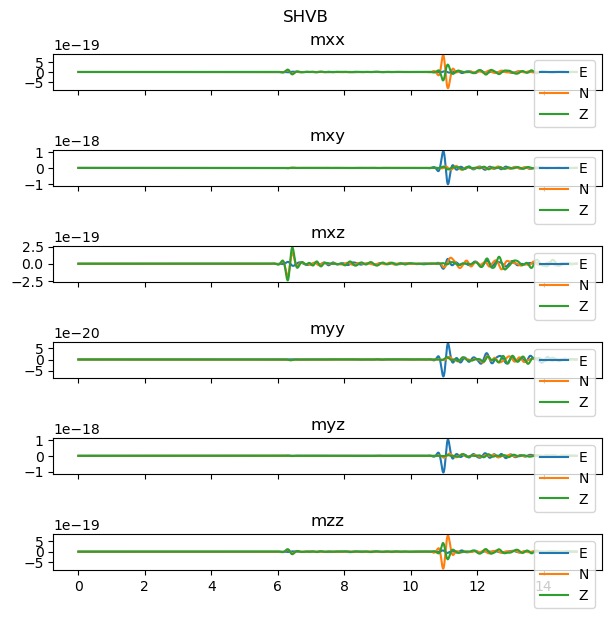

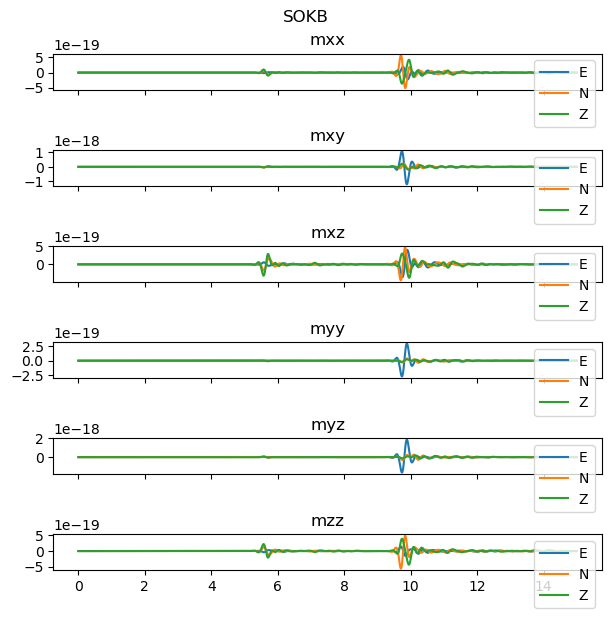

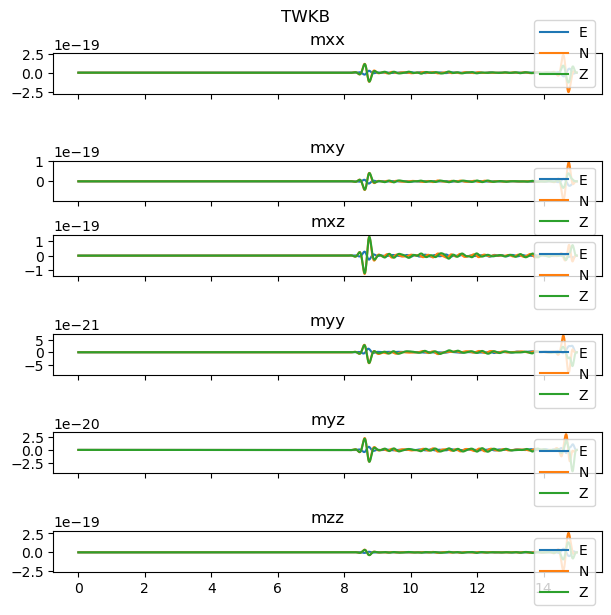

In [87]:
subset=stas
for sta in subset:
    fig, axs= plt.subplots(len(comps),1, constrained_layout=True, figsize=(6,1*len(comps)),sharex=True)
    fig.suptitle(sta)
    tmp=st.select(station=sta)
    for comp,ax in zip(comps,axs):
        tmp2=tmp.select(location=comp)
        for tr in tmp2:
            ax.plot(tr.times('relative'),tr.data,label=tr.stats.component)
        ax.set_title(comp)
        ax.legend()

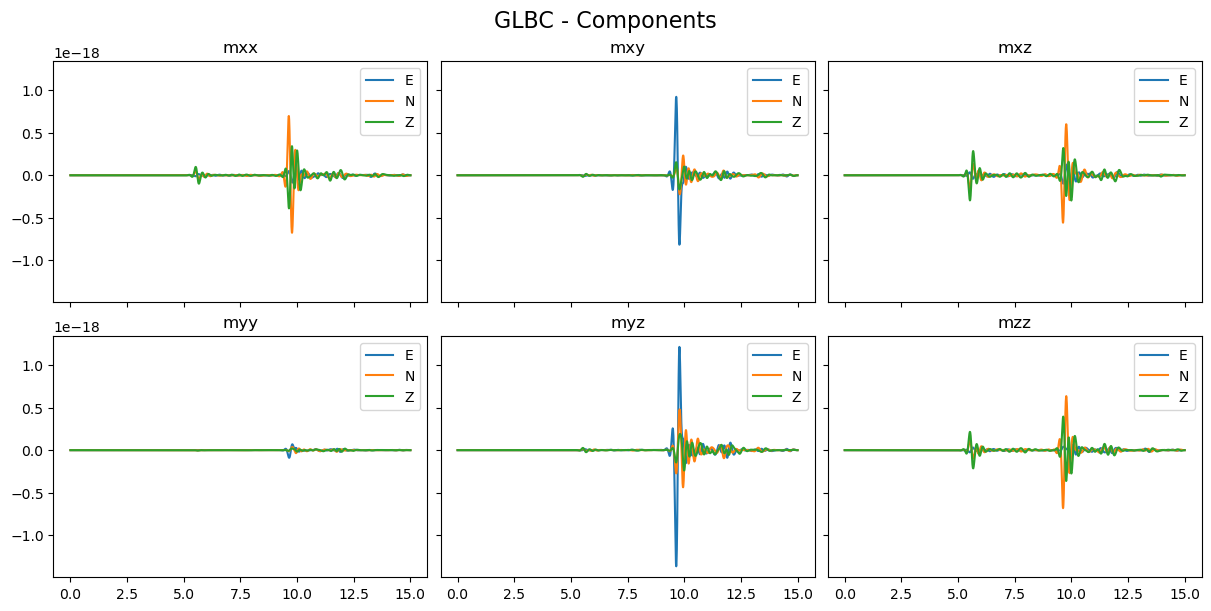

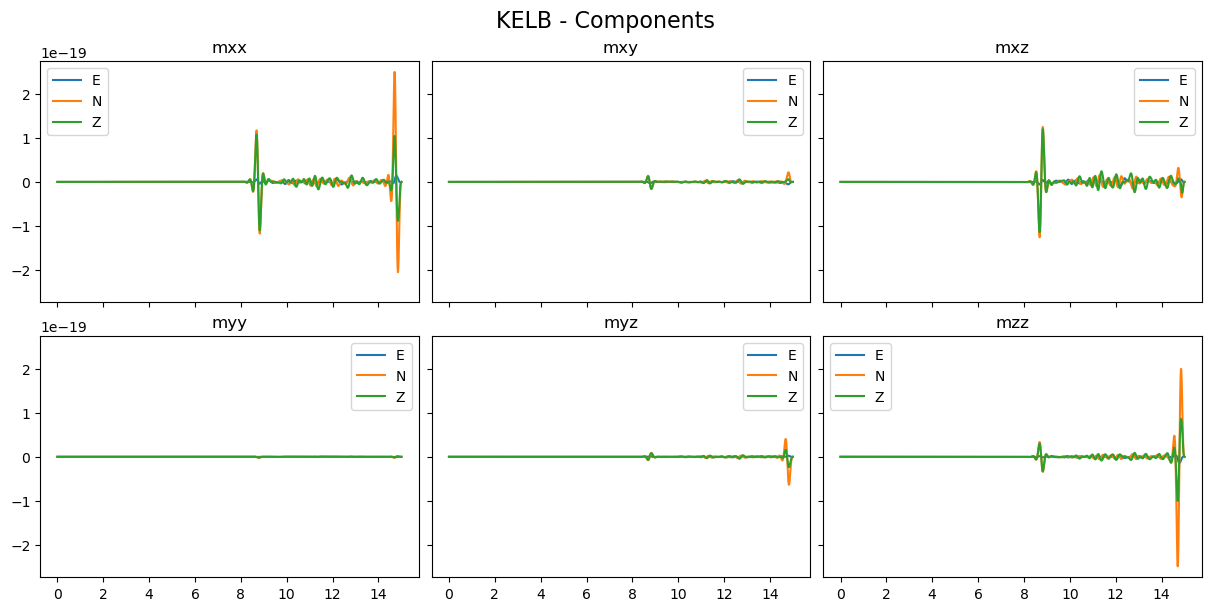

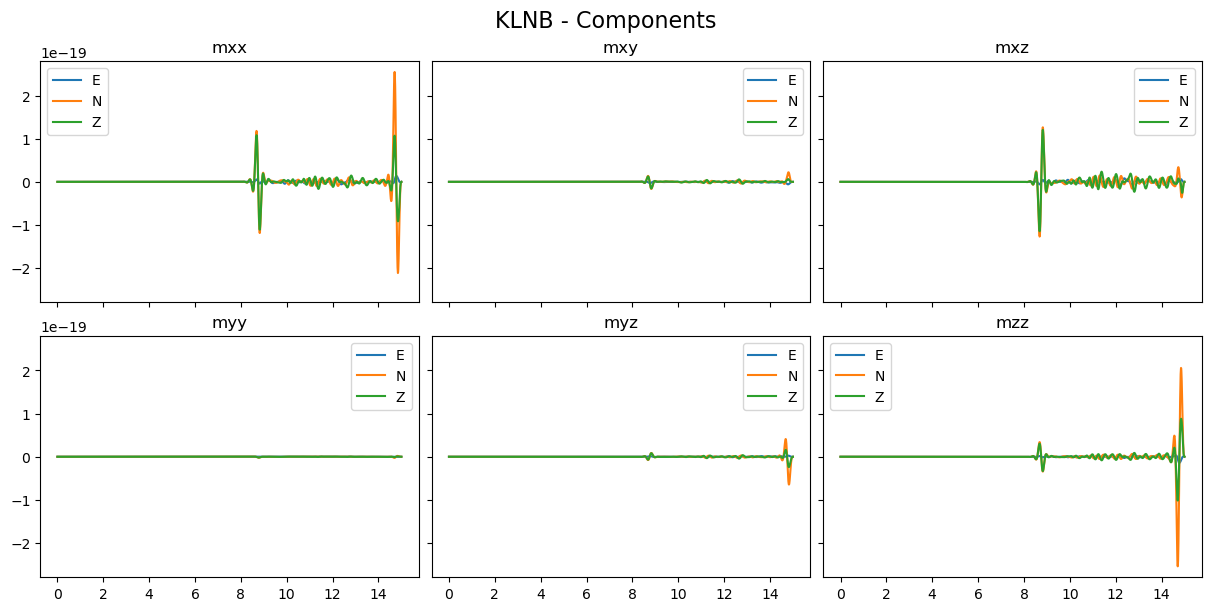

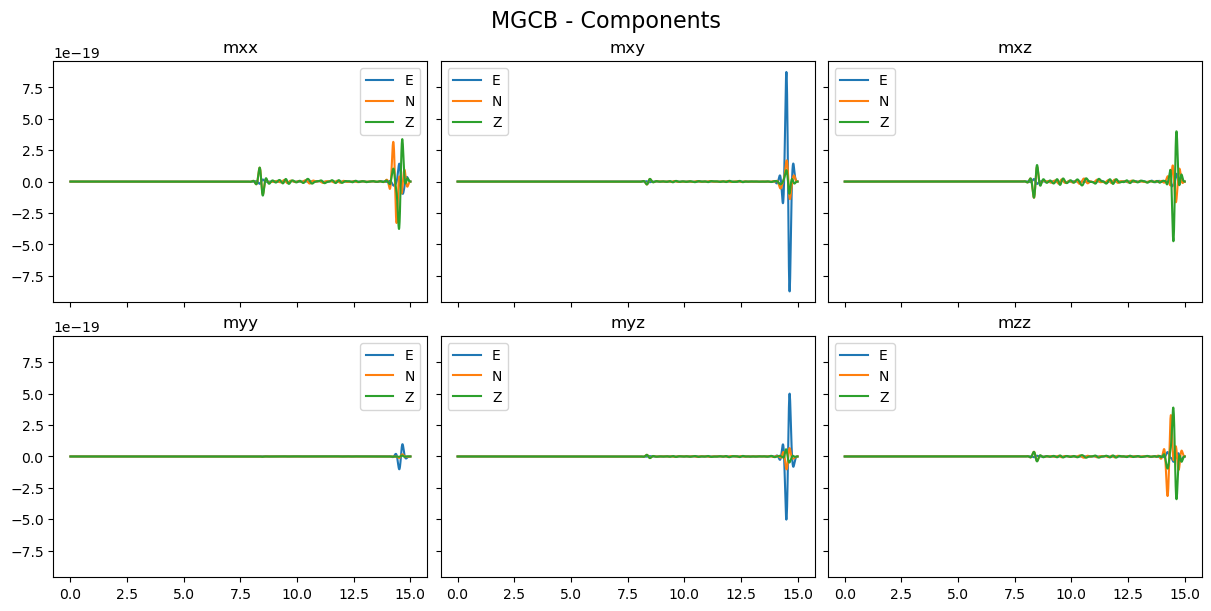

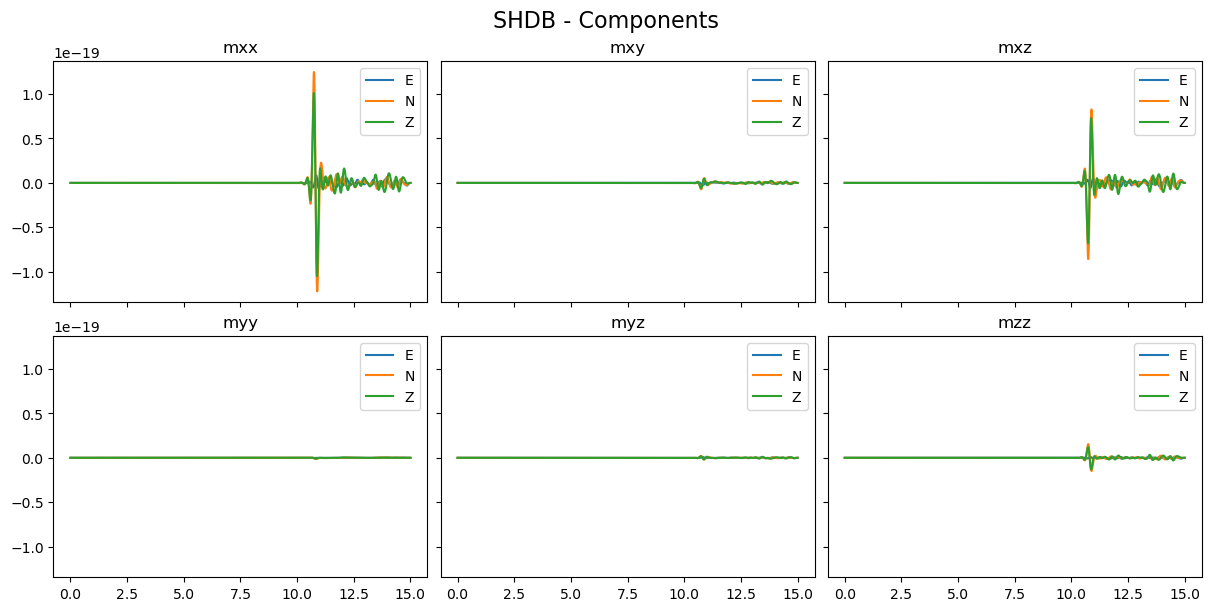

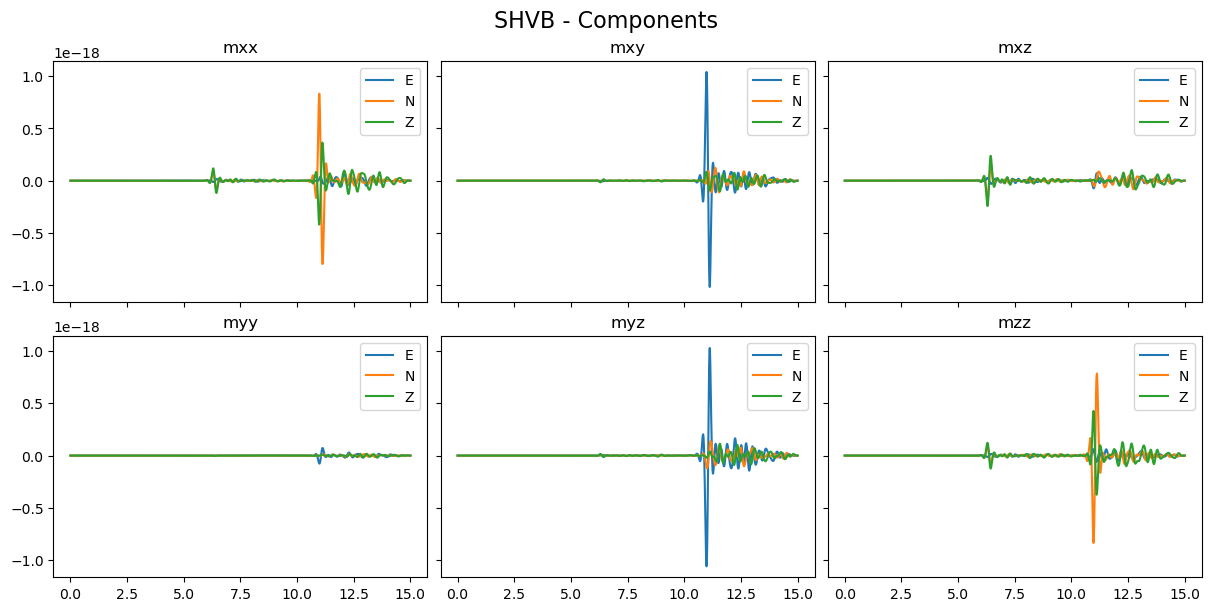

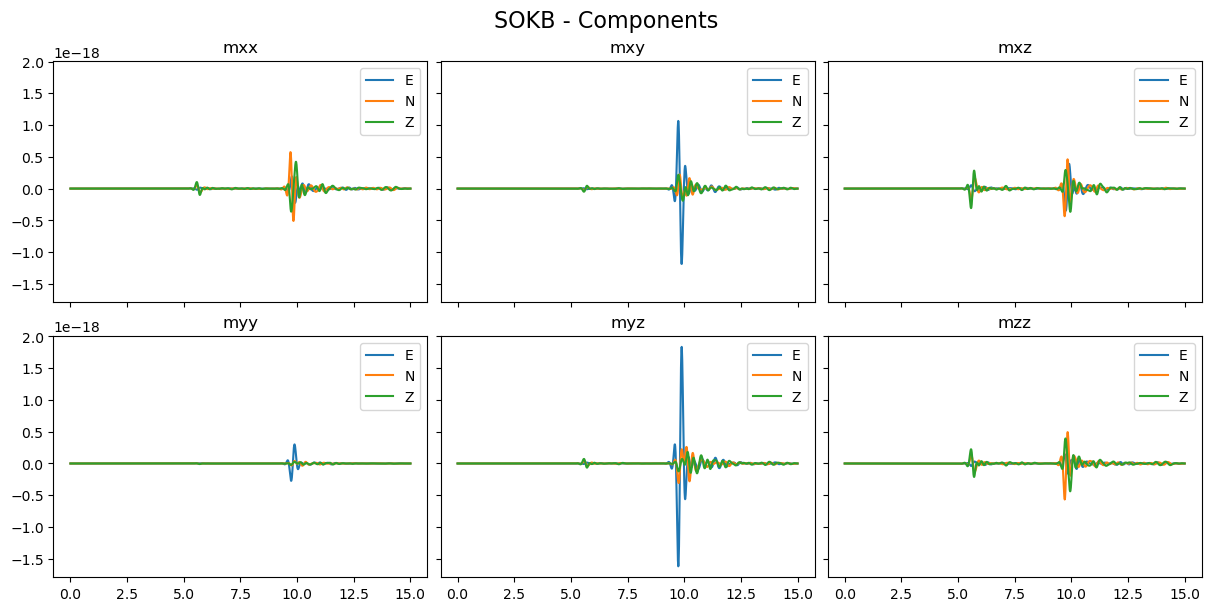

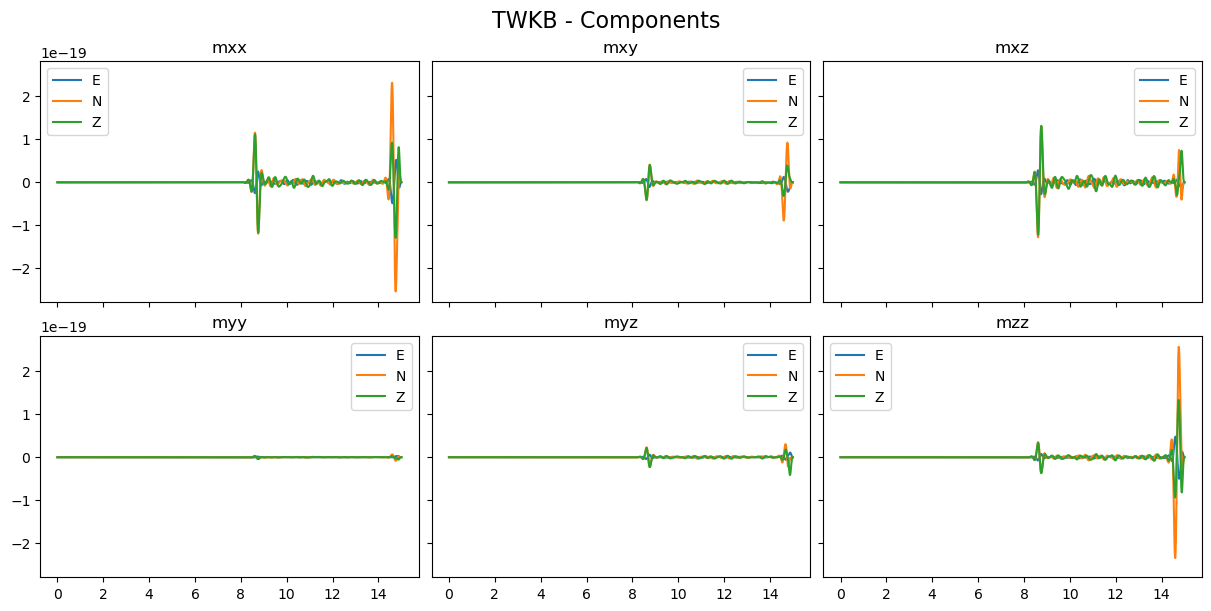

In [88]:
for sta in subset:
    fig, axs = plt.subplots(2, 3, constrained_layout=True, 
                            figsize=(12, 6), sharex=True, sharey=True)
    fig.suptitle(f"{sta} - Components", fontsize=16)
    tmp = st.select(station=sta)
    
    for i, (comp, ax) in enumerate(zip(comps, axs.flat)):
        tmp2 = tmp.select(location=comp)
        for tr in tmp2:
            ax.plot(tr.times('relative'), tr.data, label=tr.stats.component)
        ax.set_title(comp)
        ax.legend()
    
    # Hide any unused subplots (if comps has fewer than 6 components)
    for j in range(len(comps), 6):
        axs.flat[j].axis("off")
    
    # Save each figure
    fig.savefig(base_dir+f"{sta}_components_grid.png", dpi=300, bbox_inches="tight")
    plt.show(fig)


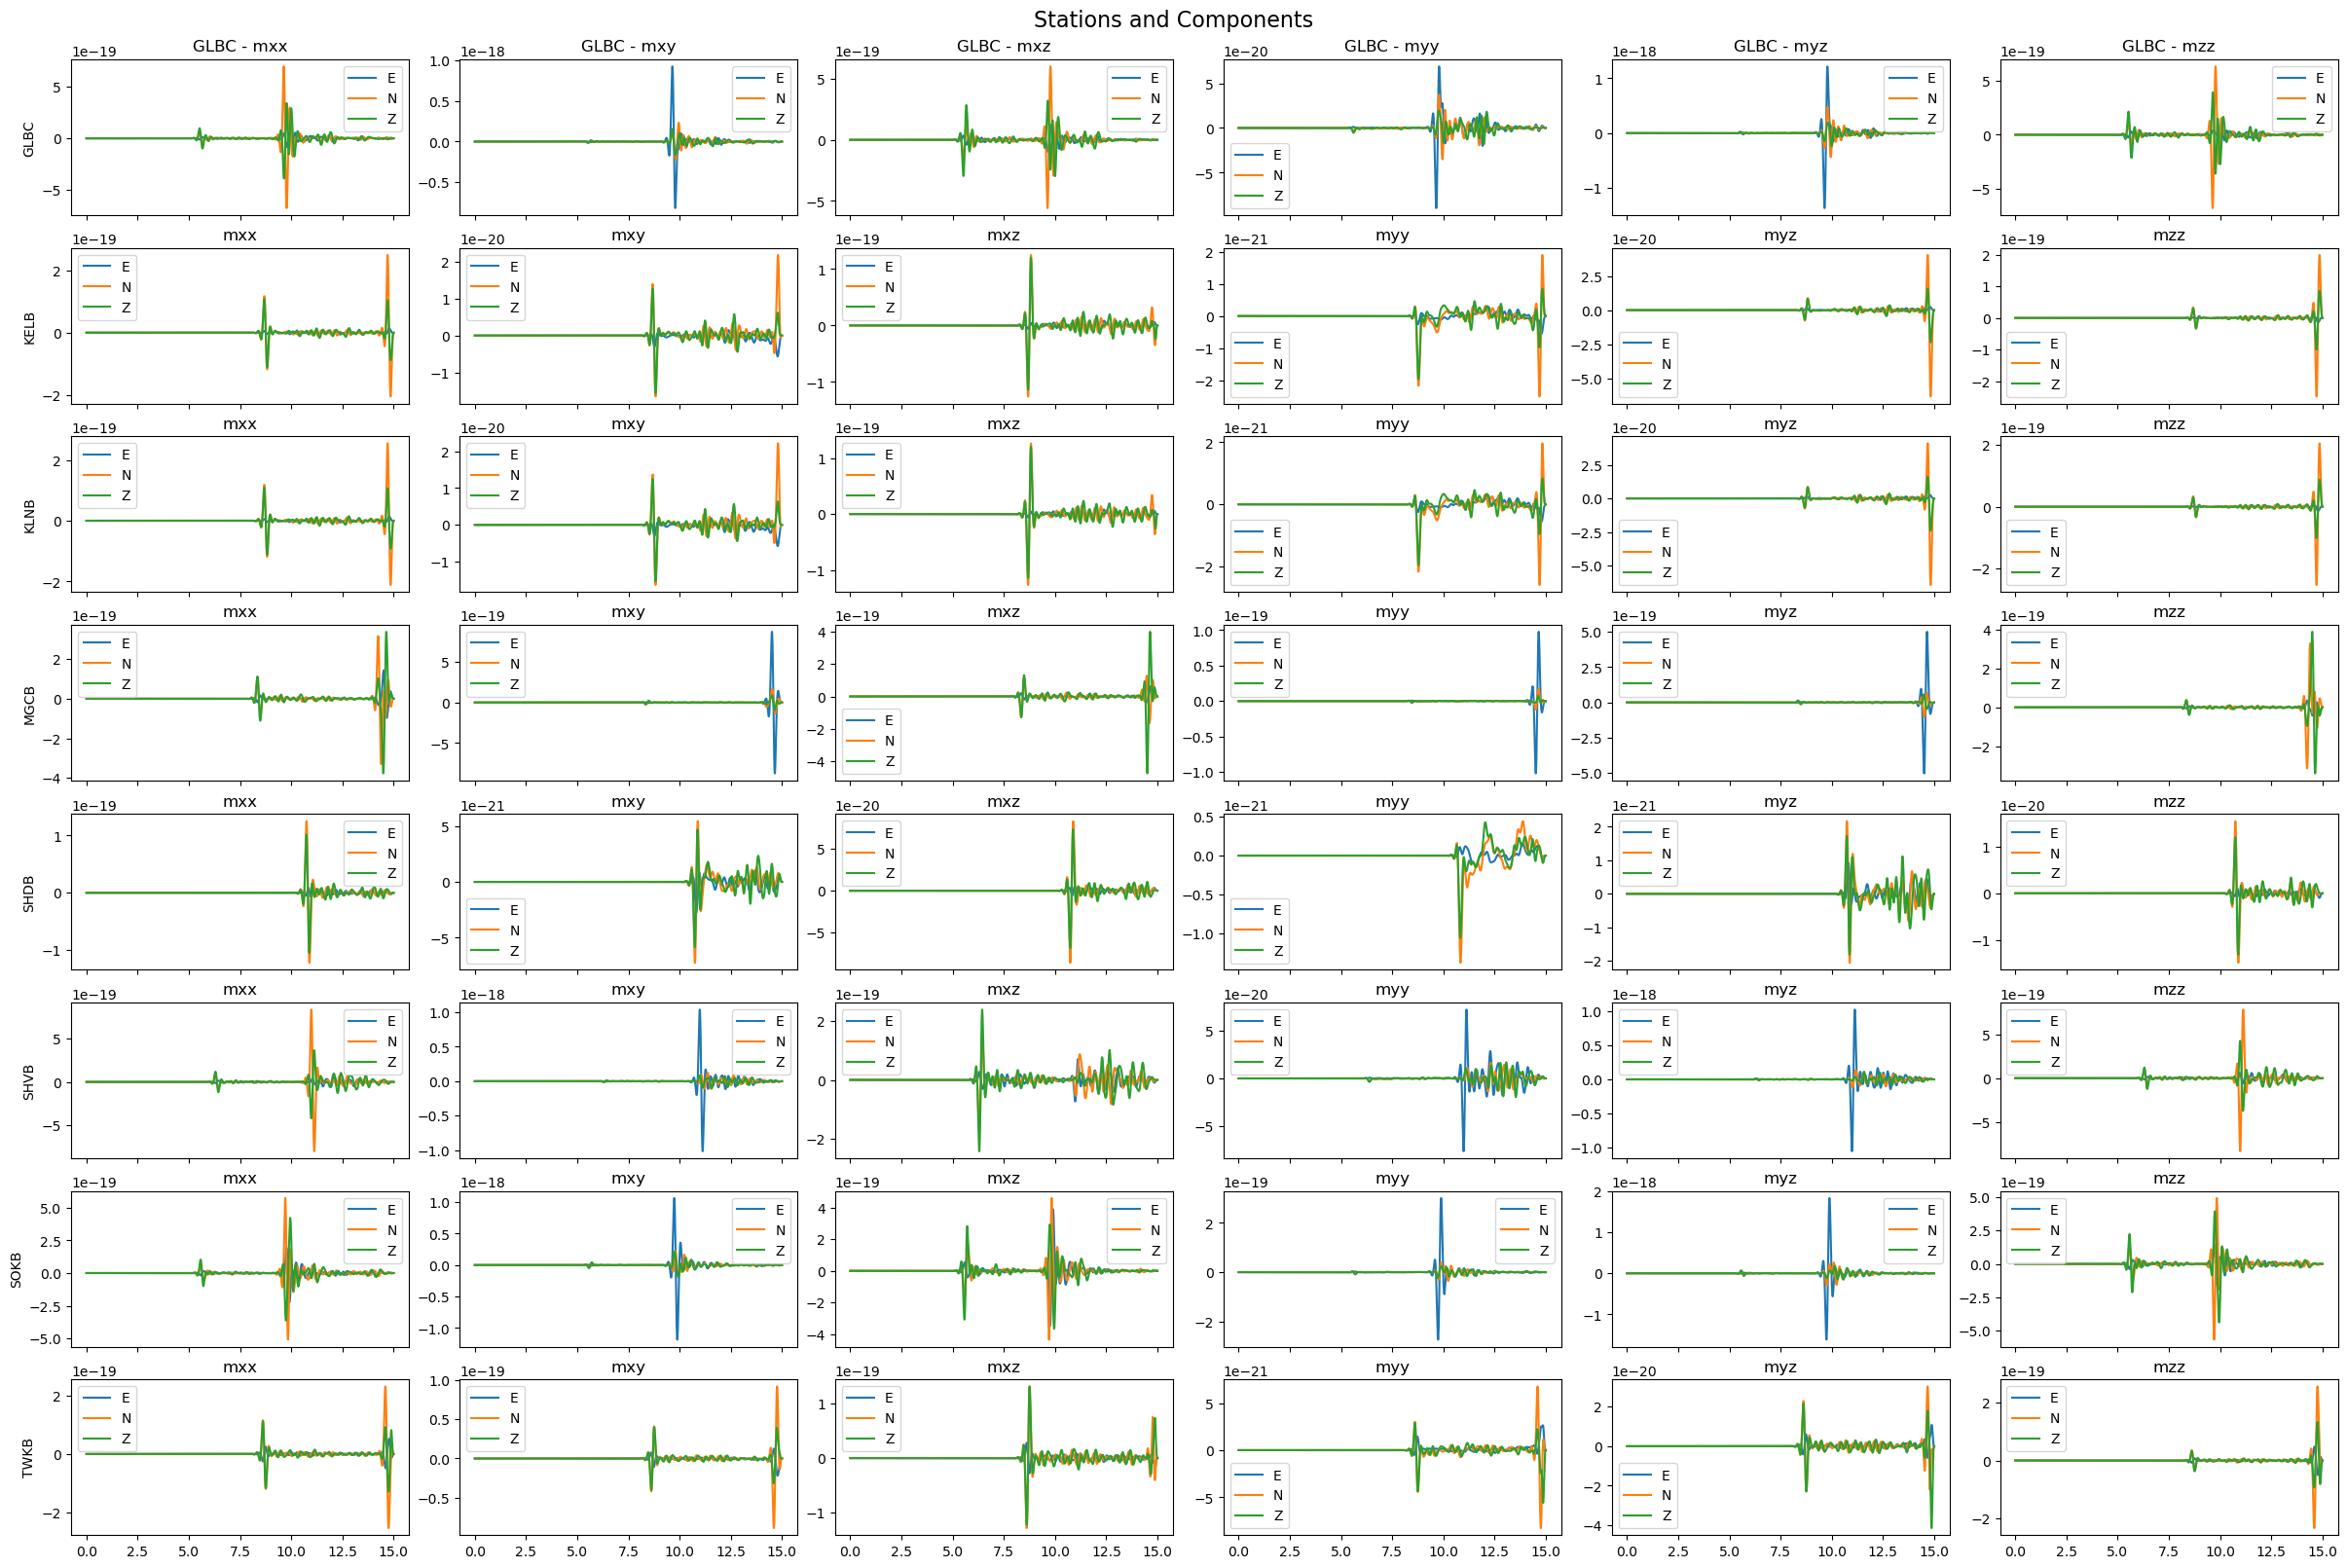

In [89]:
fig, axs = plt.subplots(len(subset), len(comps), constrained_layout=True, 
                        figsize=(len(comps) * 4, len(subset) * 2), sharex=True)

for row, sta in enumerate(subset):
    tmp = st.select(station=sta)
    for col, comp in enumerate(comps):
        ax = axs[row, col] if len(subset) > 1 else axs[col]
        tmp2 = tmp.select(location=comp)
        for tr in tmp2:
            ax.plot(tr.times('relative'), tr.data, label=tr.stats.component)
        ax.set_title(f"{sta} - {comp}" if row == 0 else f"{comp}")
        if col == 0:
            ax.set_ylabel(sta)
        ax.legend()

fig.suptitle("Stations and Components", fontsize=16)
fig.savefig(base_dir+"GFs_combined.png", dpi=300, bbox_inches="tight")


/Users/lpapin/anaconda3/envs/sw4/lib/python3.11/site-packages/obspy/imaging/beachball.py:48: UserWarning: Encountered an exception while plotting the beachball. Falling back to the mopad wrapper which is slower but more stable.
  warnings.warn(msg)


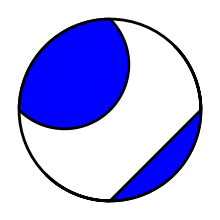

In [1]:
from obspy.imaging.beachball import beachball
MT = [1, 1, 1, 1, 1, 1] #simple values just to see
f1=beachball(MT, size=200, linewidth=2, facecolor='b')